# 📈 Predicción del Mercado de Valores con Machine Learning

## Objetivo del Proyecto

Este proyecto tiene como objetivo predecir la dirección del precio del índice S&P 500 para el día siguiente (si subirá o bajará) utilizando un modelo de Machine Learning. Partiendo de datos históricos de precios, se enriquece el modelo con indicadores técnicos y datos de mercados externos para mejorar su capacidad predictiva. La evaluación se realiza mediante un robusto proceso de **backtesting** para simular su rendimiento en condiciones reales a lo largo del tiempo.

In [136]:
import yfinance as yf

In [137]:
sp500 = yf.Ticker("^GSPC")

In [138]:
sp500 = sp500.history(period="max")

In [139]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,0.0,0.0
2025-08-05 00:00:00-04:00,6336.629883,6346.000000,6289.370117,6299.189941,5517410000,0.0,0.0
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,0.0,0.0


In [140]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-07-28 00:00:00-04:00', '2025-07-29 00:00:00-04:00',
               '2025-07-30 00:00:00-04:00', '2025-07-31 00:00:00-04:00',
               '2025-08-01 00:00:00-04:00', '2025-08-04 00:00:00-04:00',
               '2025-08-05 00:00:00-04:00', '2025-08-06 00:00:00-04:00',
               '2025-08-07 00:00:00-04:00', '2025-08-08 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24517, freq=None)

<Axes: xlabel='Date'>

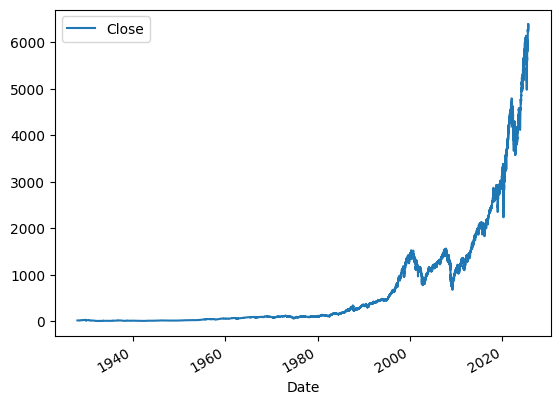

In [141]:
sp500.plot.line(y="Close", use_index=True)

In [142]:
del sp500["Dividends"]
del sp500["Stock Splits"]

### Paso 1: Preparación Inicial y Creación de la Variable Objetivo (Target)

Limpiamos el DataFrame eliminando columnas innecesarias. La clave de este paso es la creación de nuestra **variable objetivo (`Target`)**:

1.  **`Tomorrow`**: Creamos una columna que contiene el precio de cierre del día siguiente.
2.  **`Target`**: Comparamos el precio de mañana con el de hoy. Si es mayor, asignamos un `1` (subida); de lo contrario, un `0` (bajada).

Finalmente, acotamos nuestro análisis a los datos a partir de 1990 para trabajar con un contexto de mercado más moderno.

In [143]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [144]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,6299.189941
2025-08-05 00:00:00-04:00,6336.629883,6346.000000,6289.370117,6299.189941,5517410000,6345.060059
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000


In [145]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [146]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,6299.189941,0
2025-08-05 00:00:00-04:00,6336.629883,6346.000000,6289.370117,6299.189941,5517410000,6345.060059,1
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0


In [147]:
sp500 = sp500.loc["1990-01-01":].copy()

In [148]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,6299.189941,0
2025-08-05 00:00:00-04:00,6336.629883,6346.000000,6289.370117,6299.189941,5517410000,6345.060059,1
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0


In [149]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [150]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [151]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [152]:
precision_score(test["Target"], preds)

0.6271186440677966

In [153]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

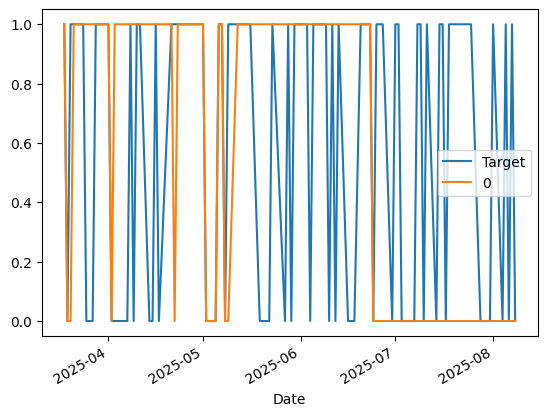

In [154]:
combined.plot()

In [155]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [156]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [157]:
predictions = backtest(sp500, model, predictors)

In [158]:
predictions["Predictions"].value_counts()

Predictions
0    3802
1    2665
Name: count, dtype: int64

In [159]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5298311444652908

In [160]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536725
0    0.463275
Name: count, dtype: float64

### Paso 2: Ingeniería de Características (Feature Engineering)

Un modelo es tan bueno como los datos que le proporcionamos. En este paso, creamos nuevos predictores para darle más contexto:

- **Indicadores Técnicos**: Calculamos medias móviles y tendencias de precios en diferentes horizontes de tiempo (2, 5, 60, 250 y 1000 días).
- **Datos de Mercados Externos**: Añadimos datos del índice **Nikkei 225 de Japón (`^N225`)** y del **Bono del Tesoro de EE. UU. a 10 años (`^TNX`)** como indicadores del sentimiento del mercado global y de las condiciones macroeconómicas.

Es crucial estandarizar las zonas horarias antes de unir los DataFrames para evitar errores de alineación de fechas.

In [162]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averges = sp500.rolling(horizon).mean()

    ratio_column = f"Close Ratio {horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averges["Close"]

    trend_column = f"Trend {horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [163]:
nikkei = yf.Ticker("^N225")
nikkei_hist = nikkei.history(period="max")

sp500.index = sp500.index.tz_localize(None)
nikkei_hist.index = nikkei_hist.index.tz_localize(None)

# Renombramos la columna 'Close' para evitar conflictos y la unimos a nuestro dataframe
sp500 = sp500.join(nikkei_hist[['Close']].rename(columns={'Close': 'Nikkei_Close'}), how='left')

# Los mercados tienen diferentes días festivos. Rellenamos los huecos del Nikkei
# con el último valor conocido (forward-fill)
sp500.fillna(method='ffill', inplace=True)

sp500['Nikkei_Ratio_5'] = sp500['Nikkei_Close'] / sp500['Nikkei_Close'].rolling(5).mean()

if 'Nikkei_Ratio_5' not in new_predictors:
    new_predictors.append('Nikkei_Ratio_5')

#Adición de tasas de interés a los datos del S&P 500
tnx = yf.Ticker("^TNX").history(period="max")

tnx.index = tnx.index.tz_localize(None)

sp500 = sp500.join(tnx[['Close']].rename(columns={'Close': 'Interest_Rate'}), how='left')
sp500.fillna(method='ffill', inplace=True)

if 'Interest_Rate' not in new_predictors:
    new_predictors.append('Interest_Rate')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8288\2459184394.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500.fillna(method='ffill', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8288\2459184394.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500.fillna(method='ffill', inplace=True)


In [164]:
sp500.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close Ratio 2,Trend 2,Close Ratio 5,Trend 5,Close Ratio 60,Trend 60,Close Ratio 250,Trend 250,Close Ratio 1000,Trend 1000,Nikkei_Close,Nikkei_Ratio_5,Interest_Rate
Date,,,,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0,17308.730469,1.012641,5.779
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0,17489.150391,1.011582,5.791
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0,17789.279297,1.020356,5.804
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0,18051.910156,1.026068,5.774
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0,17404.240234,0.988391,5.796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-04,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,6299.189941,0,1.007315,1.0,1.000272,1.0,1.039001,36.0,1.083618,144.0,1.322288,531.0,40290.699219,0.989995,4.200
2025-08-05,6336.629883,6346.000000,6289.370117,6299.189941,5517410000,6345.060059,1,0.997565,1.0,0.997672,1.0,1.032160,35.0,1.077533,144.0,1.315353,530.0,40549.539062,0.996968,4.196
2025-08-06,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0,1.003628,1.0,1.005506,2.0,1.037735,36.0,1.084560,144.0,1.324405,530.0,40794.859375,1.002308,4.220


In [165]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close Ratio 2,Trend 2,Close Ratio 5,Trend 5,Close Ratio 60,Trend 60,Close Ratio 250,Trend 250,Close Ratio 1000,Trend 1000,Nikkei_Close,Nikkei_Ratio_5,Interest_Rate
Date,,,,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.940
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.990
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38712.878906,NaN,7.980
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38274.761719,NaN,7.990
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38294.960938,NaN,8.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-04,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,6299.189941,0,1.007315,1.0,1.000272,1.0,1.039001,36.0,1.083618,144.0,1.322288,531.0,40290.699219,0.989995,4.200
2025-08-05,6336.629883,6346.000000,6289.370117,6299.189941,5517410000,6345.060059,1,0.997565,1.0,0.997672,1.0,1.032160,35.0,1.077533,144.0,1.315353,530.0,40549.539062,0.996968,4.196
2025-08-06,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0,1.003628,1.0,1.005506,2.0,1.037735,36.0,1.084560,144.0,1.324405,530.0,40794.859375,1.002308,4.220


### Paso 3: Entrenamiento y Evaluación con Backtesting

Seleccionamos el modelo **XGBoost**, conocido por su alto rendimiento. Para evaluarlo de forma robusta, definimos una función de **backtesting** que simula el rendimiento del modelo a lo largo del tiempo, reentrenándolo periódicamente con nuevos datos.

La función `predict` tiene un umbral de confianza del 60%: solo predecirá una subida si el modelo está al menos un 60% seguro, buscando así predicciones de mayor calidad.

In [196]:
#model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
from xgboost import XGBClassifier

# Creación de una instancia del modelo XGBoost en lugar del RandomForest
model = XGBClassifier(random_state=1, n_estimators=200, learning_rate=0.05, eval_metric='logloss')

In [168]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

### Paso 4: Ejecución y Resultados Finales

Ejecutamos el backtesting y calculamos la **puntuación de precisión (precision score)**. Esta métrica nos dice: *"De todas las veces que el modelo predijo que el precio subiría, ¿qué porcentaje de veces acertó?"*.

In [197]:
predictions = backtest(sp500, model, new_predictors)

In [198]:
predictions["Predictions"].value_counts()

Predictions
0.0    4726
1.0    1741
Name: count, dtype: int64

In [199]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5508328546812177